In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
from surprise import accuracy
from surprise import Reader, Dataset
from surprise import SVD, KNNBasic
from surprise.model_selection import train_test_split, cross_validate
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')
reader = Reader(rating_scale=(1, 5))
movie_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [4]:
pmf = SVD()
pmf = cross_validate(pmf, movie_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
average_mae = pmf['test_mae'].mean()
average_rmse = pmf['test_rmse'].mean()
print('Average MAE of PMF: ', average_mae)
print('Average RMSE of PMF: ', average_rmse)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8887  0.8968  0.8960  0.8937  0.9053  0.8961  0.0054  
MAE (testset)     0.6843  0.6889  0.6923  0.6874  0.6972  0.6900  0.0044  
Fit time          1.58    1.53    1.56    1.54    1.50    1.54    0.03    
Test time         0.31    0.21    0.30    0.20    0.29    0.26    0.05    
Average MAE of PMF:  0.6899922720297555
Average RMSE of PMF:  0.8960887279777353


In [5]:
# UCF
ucf = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
ucf = cross_validate(ucf, movie_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
average_mae = ucf['test_mae'].mean()
average_rmse = ucf['test_rmse'].mean()
print('Average MAE of UCF: ', average_mae)
print('Average RMSE of UCF: ', average_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9984  0.9970  0.9907  0.9900  0.9882  0.9929  0.0041  
MAE (testset)     0.7726  0.7692  0.7636  0.7627  0.7654  0.7667  0.0037  
Fit time          0.23    0.26    0.25    0.24    0.25    0.25    0.01    
Test time         2.41    2.49    2.49    2.42    2.53    2.47    0.04    
Average MAE of UCF:  0.7666761945126329
Average RMSE of UCF:  0.9928928184636259


In [6]:
# ICF
icf = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
icf = cross_validate(icf, movie_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
average_mae = icf['test_mae'].mean()
average_rmse = icf['test_rmse'].mean()
print('Average MAE of ICF: ', average_mae)
print('Average RMSE of ICF: ', average_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9915  0.9907  1.0015  0.9917  1.0010  0.9953  0.0049  
MAE (testset)     0.7700  0.7686  0.7788  0.7730  0.7787  0.7738  0.0043  
Fit time          7.25    6.54    6.58    6.48    6.53    6.68    0.29    
Test time         10.71   11.03   11.12   11.20   10.98   11.01   0.17    
Average MAE of ICF:  0.7738038609854397
Average RMSE of ICF:  0.9952932339129497


D.) After comparing the average MAE and RMSE across the PMF, UCF, and ICF models, we see that the Item-based Collaborative Filtering model performs the best.

In [7]:
ucf_mae_avgs = []
icf_mae_avgs = []
ucf_rmse_avgs = []
icf_rmse_avgs = []
similarities = ['cosine', 'msd', 'pearson']

for sim in similarities:
    ucf = KNNBasic(sim_options={'name': sim, 'user_based': True})
    ucf = cross_validate(ucf, movie_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    average_mae = ucf['test_mae'].mean()
    average_rmse = ucf['test_rmse'].mean()
    ucf_mae_avgs.append(average_mae)
    ucf_rmse_avgs.append(average_rmse)
    print('Average MAE of ICF: ', average_mae)
    print('Average RMSE of UCF: ', average_rmse)
    
    icf = KNNBasic(sim_options={'name': sim, 'user_based': False})
    icf = cross_validate(icf, movie_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    average_mae = icf['test_mae'].mean()
    average_rmse = icf['test_rmse'].mean()
    icf_mae_avgs.append(average_mae)
    icf_rmse_avgs.append(average_rmse)
    print('Average MAE of ICF: ', average_mae)
    print('Average RMSE of ICF: ', average_rmse)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9972  0.9912  1.0059  0.9923  0.9914  0.9956  0.0056  
MAE (testset)     0.7697  0.7660  0.7747  0.7663  0.7670  0.7687  0.0032  
Fit time          0.24    0.26    0.25    0.26    0.27    0.25    0.01    
Test time         2.42    2.44    2.55    2.47    2.64    2.50    0.08    
Average MAE of ICF:  0.7687374031823073
Average RMSE of UCF:  0.9955950334244275
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similari

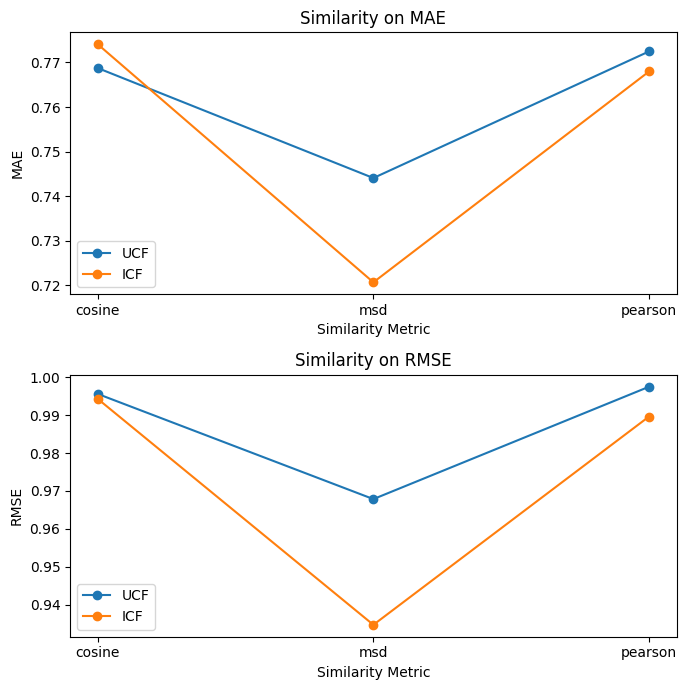

In [8]:
plt.figure(figsize=(7, 7))

plt.subplot(2, 1, 1)
plt.plot(similarities, ucf_mae_avgs, marker='o', label='UCF')
plt.plot(similarities, icf_mae_avgs, marker='o', label='ICF')
plt.title('Similarity on MAE')
plt.xlabel('Similarity Metric')
plt.ylabel('MAE')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(similarities, ucf_rmse_avgs, marker='o', label='UCF')
plt.plot(similarities, icf_rmse_avgs, marker='o', label='ICF')
plt.title('Similarity on RMSE')
plt.xlabel('Similarity Metric')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

E.) After looking at the plots, we can see that both MAE and RMSE are not consistent with each other across the three metrics.

In [9]:
ucf_mae_avgs = []
icf_mae_avgs = []
ucf_rmse_avgs = []
icf_rmse_avgs = []
ks = [1, 5, 10, 15, 20]

for k in ks:
    ucf = KNNBasic(k=k, sim_options={'user_based': True})
    ucf = cross_validate(ucf, movie_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    average_mae = ucf['test_mae'].mean()
    average_rmse = ucf['test_rmse'].mean()
    ucf_mae_avgs.append(average_mae)
    ucf_rmse_avgs.append(average_rmse)
    
    icf = KNNBasic(k=k, sim_options={'user_based': False})
    icf = cross_validate(icf, movie_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    average_mae = icf['test_mae'].mean()
    average_rmse = icf['test_rmse'].mean()
    icf_mae_avgs.append(average_mae)
    icf_rmse_avgs.append(average_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2025  1.2012  1.2229  1.2095  1.2162  1.2105  0.0082  
MAE (testset)     0.8926  0.8961  0.9116  0.9011  0.9063  0.9015  0.0068  
Fit time          0.16    0.18    0.17    0.18    0.17    0.17    0.01    
Test time         1.16    1.26    1.16    1.24    1.12    1.19    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

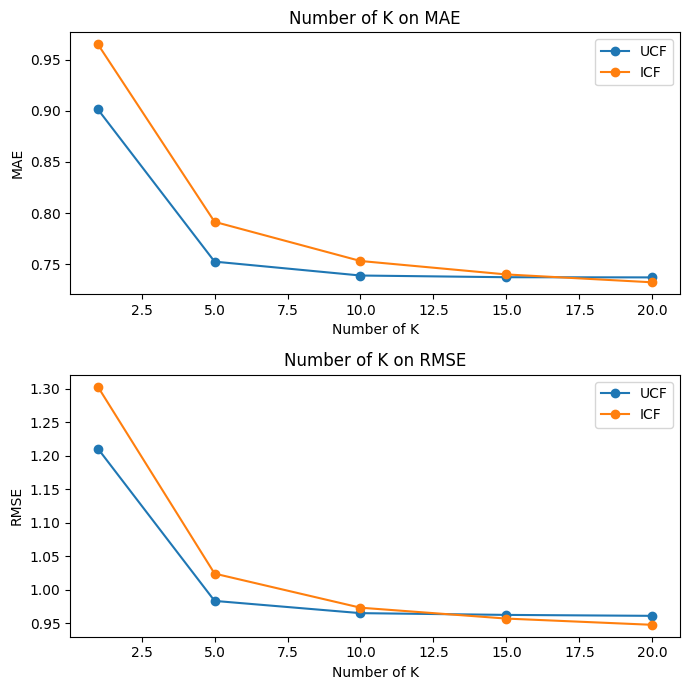

In [10]:
plt.figure(figsize=(7, 7))

plt.subplot(2, 1, 1)
plt.plot(ks, ucf_mae_avgs, marker='o', label='UCF')
plt.plot(ks, icf_mae_avgs, marker='o', label='ICF')
plt.title('Number of K on MAE')
plt.xlabel('Number of K')
plt.ylabel('MAE')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ks, ucf_rmse_avgs, marker='o', label='UCF')
plt.plot(ks, icf_rmse_avgs, marker='o', label='ICF')
plt.title('Number of K on RMSE')
plt.xlabel('Number of K')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

G.) In terms of RMSE, the best number of neighbors for User-based Collaborative Filtering is 15. This is consistent with Item-based Collaborative Filtering, whose best number of neighbors is also 15.